In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth
import bar_chart_race as bcr
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter



In [357]:
df = pd.read_csv('international-tourist new.csv')

In [358]:
df.head(8)

,country,Year,International tourist arrivals by region,percentage
0,Africa,1995,12832774.0,África: 3% - 5%
1,Americas,1995,101567080.0,Américas: 15% - 20%
2,East Asia and the Pacific,1995,114378800.0,Ásia Oriental e Pacífico: 20% - 25%
3,Europe,1995,299340380.0,Europa: 40% - 45%
4,Middle East,1995,10119565.0,Oriente Médio: 5% - 8%
5,Not classified,1995,10150115.0,Não classificado: 1% - 3%\n
6,South Asia,1995,4779760.0,Sul da Ásia: 5% - 8%
7,Africa,1996,14155691.0,África: 3% - 5%


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   country                                   189 non-null    object 
 1   Year                                      189 non-null    int64  
 2   International tourist arrivals by region  189 non-null    float64
 3   percentage                                189 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.0+ KB


In [360]:
# Define the summer-themed colormap
summer_cmap = ['#FF70AB', '#97E7E1', '#6AD4DD', '#7AA2E3', '#ADA2FF', '#C0DEFF']
custom_cmap = ListedColormap(summer_cmap)

# Clean and preprocess the data
# Standardize column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Extract numerical percentage ranges
df['percentage_min'] = df['percentage'].str.extract(r'(\d+)%')[0].astype(float)
df['percentage_max'] = df['percentage'].str.findall(r'(\d+)%').apply(lambda x: float(x[-1]) if x else None)

# Calculate the average percentage
df['percentage_avg'] = (df['percentage_min'] + df['percentage_max']) / 2

# Pivot the data for arrivals and percentage
arrivals_pivot = df.pivot(index='year', columns='country', values='international_tourist_arrivals_by_region')
percentage_pivot = df.pivot(index='year', columns='country', values='percentage')

# Combine the pivot tables
pivot_combined = pd.concat([arrivals_pivot, percentage_pivot], axis=1, keys=['arrivals', 'percentage'])

# Summary statistics to identify potential years of interest
summary = df.groupby('year')['international_tourist_arrivals_by_region'].sum()



In [361]:
pivot_combined.head()

arrivals                                                      \
country      Africa     Americas East Asia and the Pacific       Europe   
year                                                                      
1995     12832774.0  101567080.0               114378800.0  299340380.0   
1996     14155691.0  109251144.0               125587384.0  381872800.0   
1997     13967372.0  114045180.0               130557200.0  432696580.0   
1998     15619527.0  119572030.0               131372620.0  449979100.0   
1999     15523998.0  121239190.0               148024540.0  463903740.0   

                                                    percentage  \
country Middle East Not classified South Asia           Africa   
year                                                             
1995     10119565.0     10150115.0  4779760.0  África: 3% - 5%   
1996      9920710.0      8435827.0  5089573.0  África: 3% - 5%   
1997     10553928.0      9140661.0  5426766.0  África: 3% - 5%   
1998     11949030.0     10631038.0  5627012.0  África: 3% - 5%   
1999     12279016.0     11328200.0  6155573.0  África: 3% - 5%   

                                                                   \
country             Americas            East Asia and the Pacific   
year                                                                
1995     Américas: 15% - 20%  Ásia Oriental e Pacífico: 20% - 25%   
1996     Américas: 15% - 20%  Ásia Oriental e Pacífico: 20% - 25%   
1997     Américas: 15% - 20%  Ásia Oriental e Pacífico: 20% - 25%   
1998     Américas: 15% - 20%  Ásia Oriental e Pacífico: 20% - 25%   
1999     Américas: 15% - 20%  Ásia Oriental e Pacífico: 20% - 25%   

                                                    \
country             Europe             Middle East   
year                                                 
1995     Europa: 40% - 45%  Oriente Médio: 5% - 8%   
1996     Europa: 40% - 45%  Oriente Médio: 5% - 8%   
1997     Europa: 40% - 45%  Oriente Médio: 5% - 8%   
1998     Europa: 40% - 45%  Oriente Médio: 5% - 8%   
1999     Europa: 40% - 45%  Oriente Médio: 5% - 8%   

                                                            
country               Not classified            South Asia  
year                                                        
1995     Não classificado: 1% - 3%\n  Sul da Ásia: 5% - 8%  
1996     Não classificado: 1% - 3%\n  Sul da Ásia: 5% - 8%  
1997     Não classificado: 1% - 3%\n  Sul da Ásia: 5% - 8%  
1998     Não classificado: 1% - 3%\n  Sul da Ásia: 5% - 8%  
1999     Não classificado: 1% - 3%\n  Sul da Ásia: 5% - 8%

In [362]:
# Set a white background style for plots
plt.style.use('default')

In [363]:
# Function to format numbers with commas
def format_number(x, pos):
    return f'{int(x):,}'

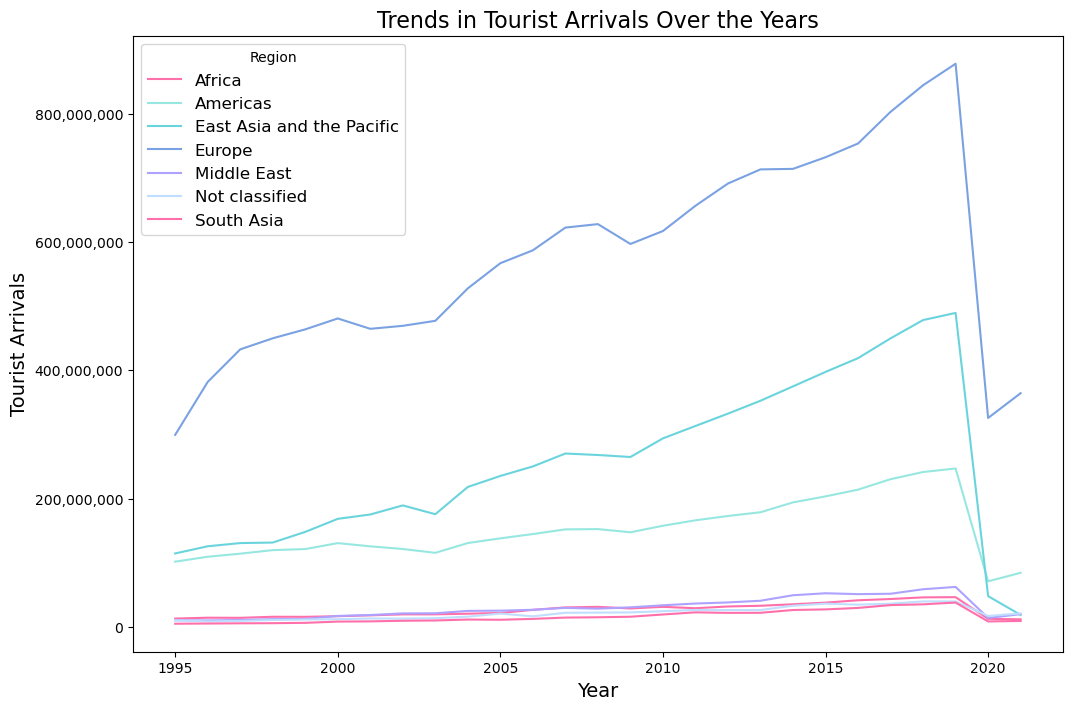

In [364]:
# Visualization 1: Trends in Tourist Arrivals Over the Years
plt.figure(figsize=(12, 8))
for region in arrivals_pivot.columns:
    plt.plot(arrivals_pivot.index, arrivals_pivot[region], label=region, color=summer_cmap[arrivals_pivot.columns.get_loc(region) % len(summer_cmap)])
plt.title('Trends in Tourist Arrivals Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Tourist Arrivals', fontsize=14)
plt.legend(title='Region', fontsize=12)
plt.grid(False)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))
plt.show()

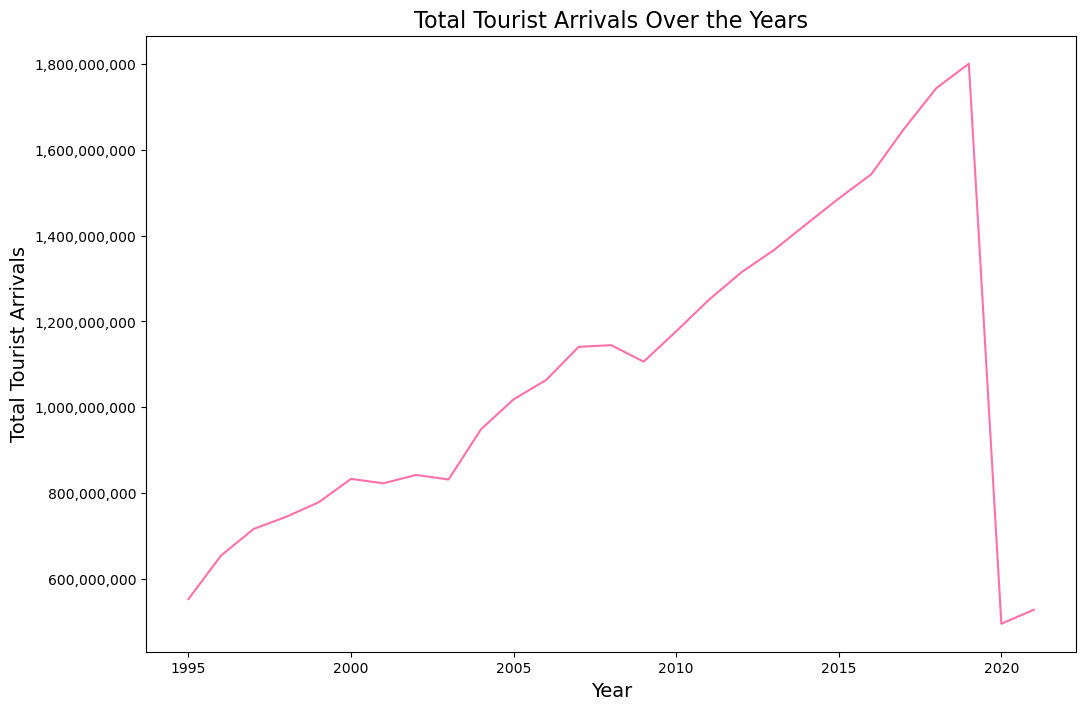

In [365]:
# Visualization 2: Total Tourist Arrivals Over the Years
plt.figure(figsize=(12, 8))
summary.plot(kind='line', color=summer_cmap[0])
plt.title('Total Tourist Arrivals Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Tourist Arrivals', fontsize=14)
plt.grid(False)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))
plt.show()



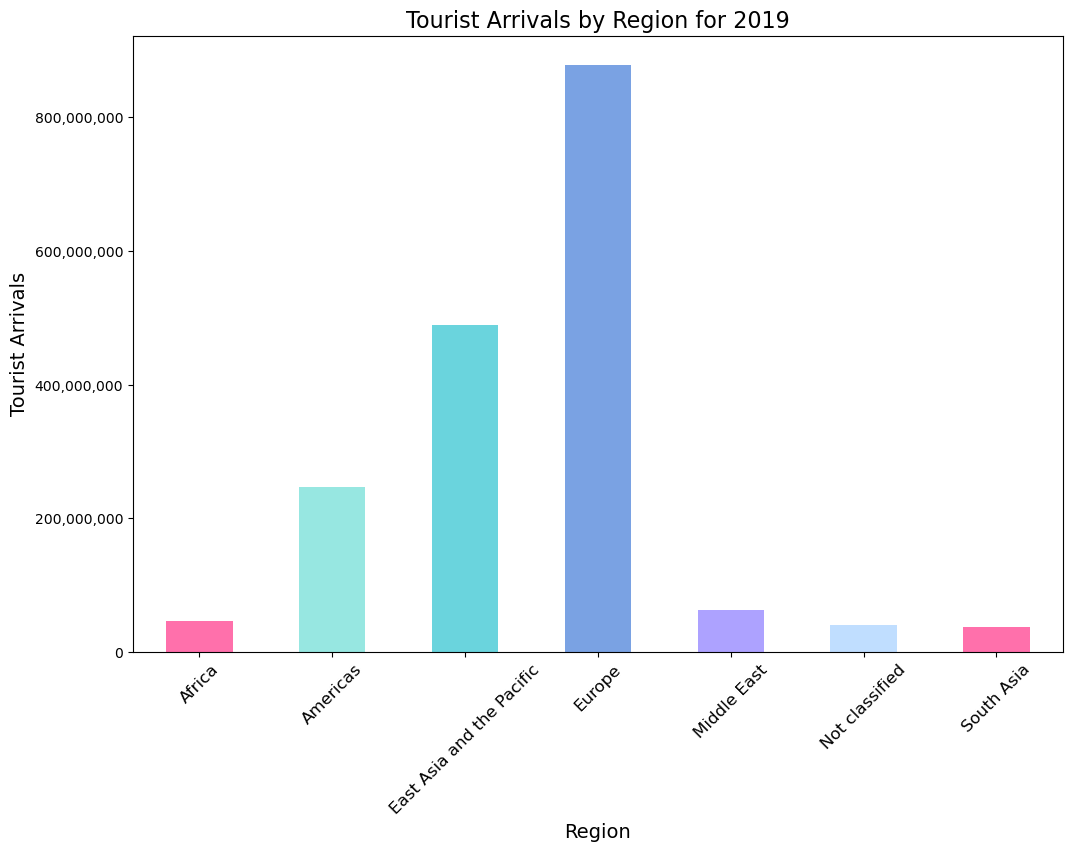

In [366]:
# Visualization 3:  Bar Chart for 2019 Tourist Arrivals by Region
year = 2019
arrivals_2019 = arrivals_pivot.loc[year].dropna()
plt.figure(figsize=(12, 8))
arrivals_2019.plot(kind='bar', color=summer_cmap)
plt.title(f'Tourist Arrivals by Region for {year}', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Tourist Arrivals', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(False)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))
plt.show()


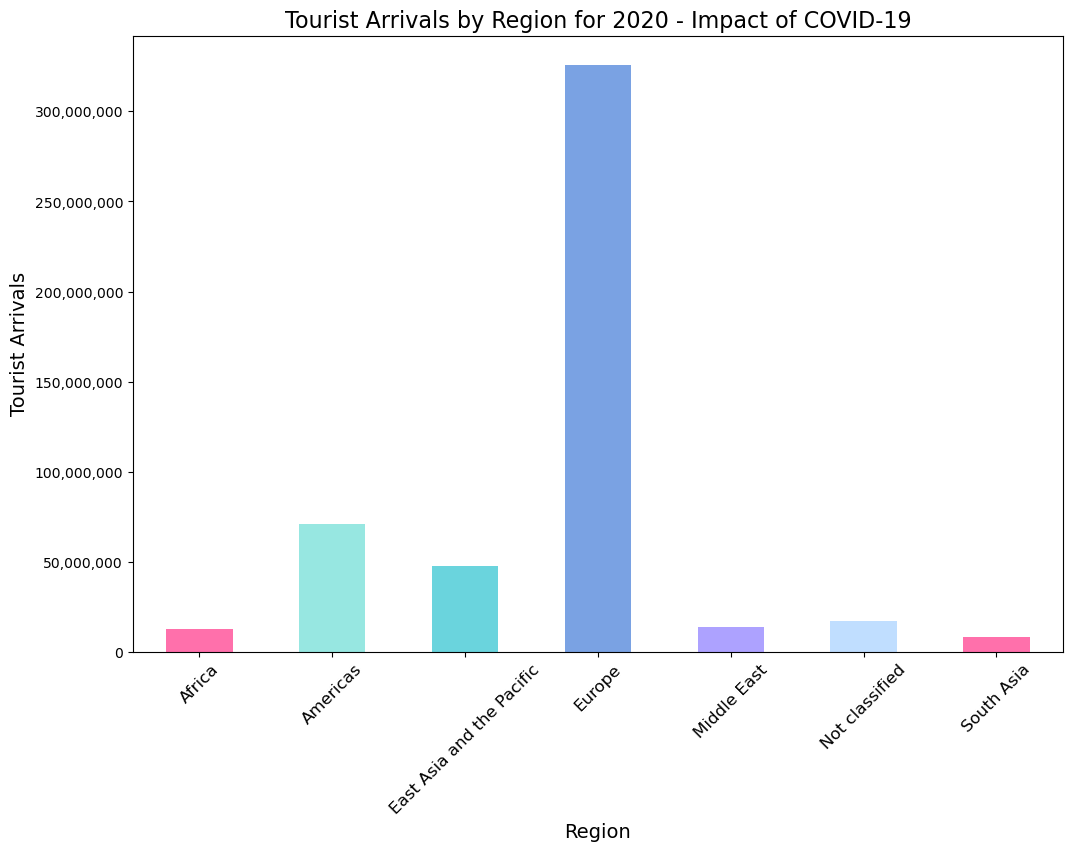

In [367]:
# Visualization 4: Bar Chart for 2020 Tourist Arrivals by Region
year = 2020
arrivals_2020 = arrivals_pivot.loc[year].dropna()
plt.figure(figsize=(12, 8))
arrivals_2020.plot(kind='bar', color=summer_cmap)
plt.title(f'Tourist Arrivals by Region for {year} - Impact of COVID-19', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Tourist Arrivals', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(False)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))
plt.show()

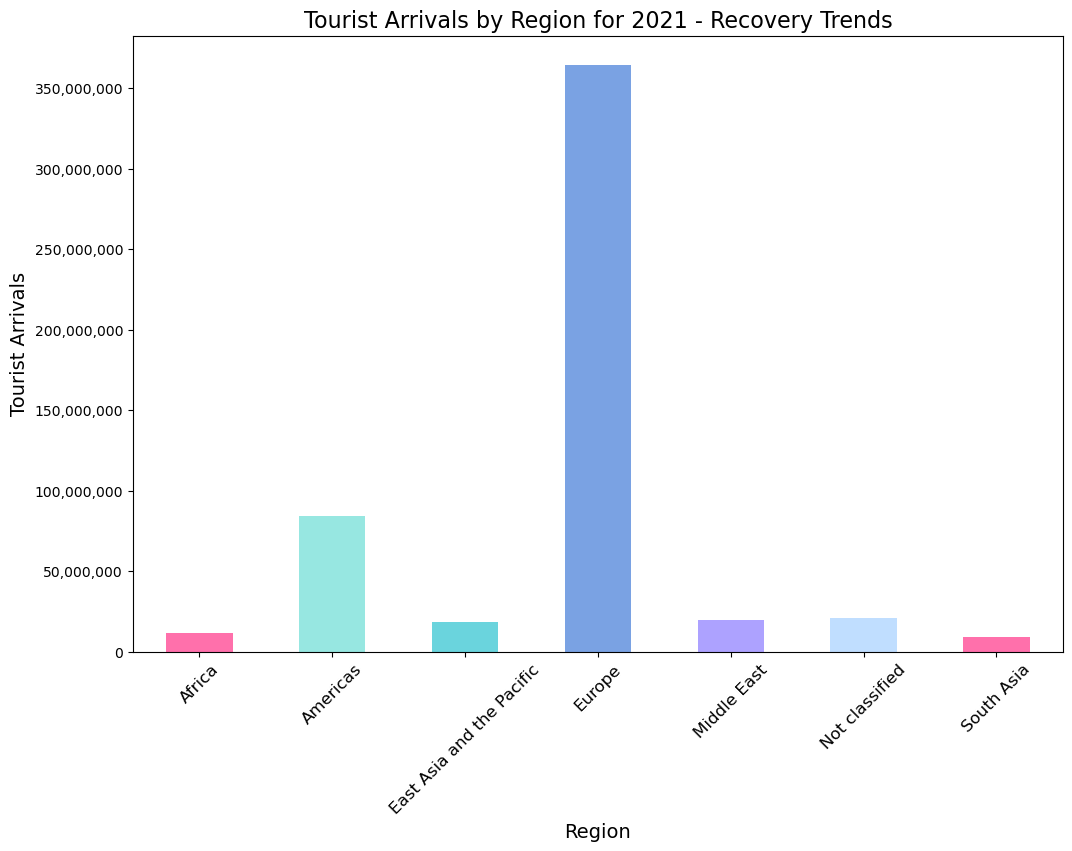

In [368]:
# Visualization 5: Recovery Trends - 2021 Tourist Arrivals by Region
year = 2021
arrivals_2021 = arrivals_pivot.loc[year].dropna()
plt.figure(figsize=(12, 8))
arrivals_2021.plot(kind='bar', color=summer_cmap)
plt.title(f'Tourist Arrivals by Region for {year} - Recovery Trends', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Tourist Arrivals', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(False)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))
plt.show()


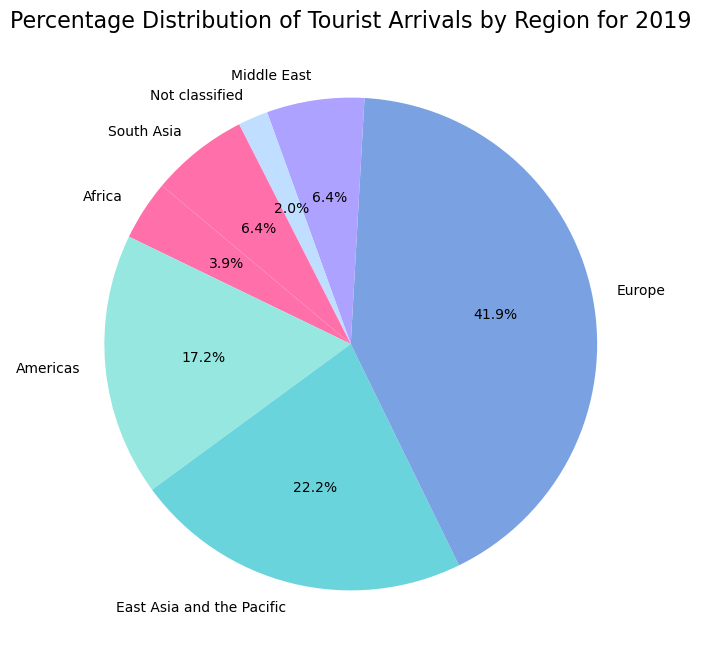

In [369]:
# Visualization 6: Percentage Distribution of Tourist Arrivals in 2019
percentages_2019_cleaned = df[df['year'] == 2019][['country', 'percentage']].copy()
percentages_2019_cleaned['percentage_values'] = percentages_2019_cleaned['percentage'].str.findall(r'(\d+)%').apply(lambda x: [float(i) for i in x])
percentages_2019_cleaned['percentage_avg'] = percentages_2019_cleaned['percentage_values'].apply(lambda x: sum(x)/len(x) if len(x) > 0 else 0)
percentages_2019_cleaned.set_index('country', inplace=True)

plt.figure(figsize=(12, 8))
percentages_2019_cleaned['percentage_avg'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=summer_cmap)
plt.title(f'Percentage Distribution of Tourist Arrivals by Region for 2019', fontsize=16)
plt.ylabel('')
plt.show()


In [370]:
# Visualization 7: Map of Tourist Arrivals in 2019
coordinates = {
    'Africa': [1.5, 17.5],
    'Americas': [37.6, -95.7],
    'East Asia and the Pacific': [35.8, 104.2],
    'Europe': [54.5, 15.3],
    'Middle East': [24.0, 45.0],
    'South Asia': [20.5, 80.0]
}

# Create a Folium map centered around the world
m = folium.Map(location=[20, 0], zoom_start=2)

# Add markers with colored pins for tourist arrivals
for index, row in df[df['year'] == 2019].iterrows():
    region = row['country']
    if region in coordinates:
        folium.Marker(
            location=coordinates[region],
            popup=f"Tourist Arrivals: {int(row['international_tourist_arrivals_by_region']):,}",
            tooltip=f"Tourist Arrivals: {int(row['international_tourist_arrivals_by_region']):,}",
            icon=folium.Icon(color='white', icon_color=summer_cmap[list(coordinates.keys()).index(region) % len(summer_cmap)], icon='info-sign')
        ).add_to(m)
# Save the map as an HTML file
map_path = 'tourist_arrivals_map_with_markers.html'
m.save(map_path)

print("Map saved to:", map_path)


Map saved to: tourist_arrivals_map_with_markers.html


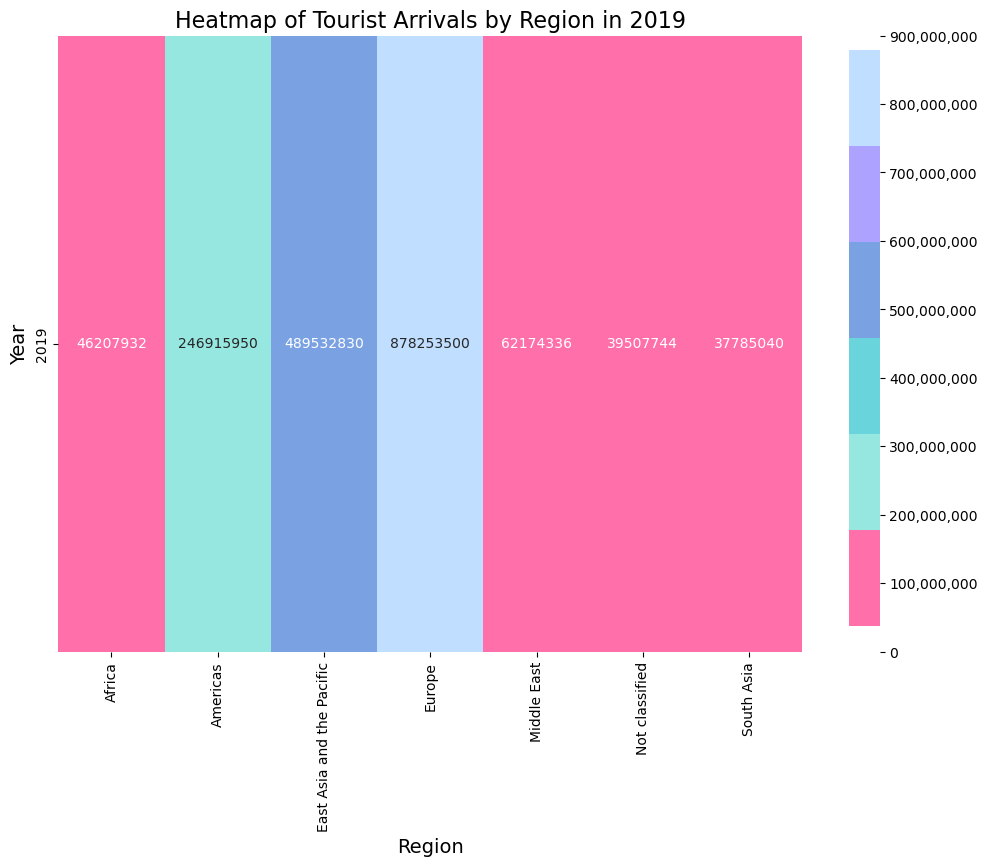

In [371]:
# Visualization 8: Heatmap of Tourist Arrivals in 2019
plt.figure(figsize=(12, 8))
ax = sns.heatmap(arrivals_pivot.loc[[2019]].astype(int), annot=True, fmt='d', cmap=custom_cmap, 
                 annot_kws={"size": 10})

# Apply the number formatter to the color bar
colorbar = ax.collections[0].colorbar
colorbar.set_ticks(colorbar.get_ticks())
colorbar.set_ticklabels([f'{int(tick):,}' for tick in colorbar.get_ticks()])

plt.title('Heatmap of Tourist Arrivals by Region in 2019', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.show()

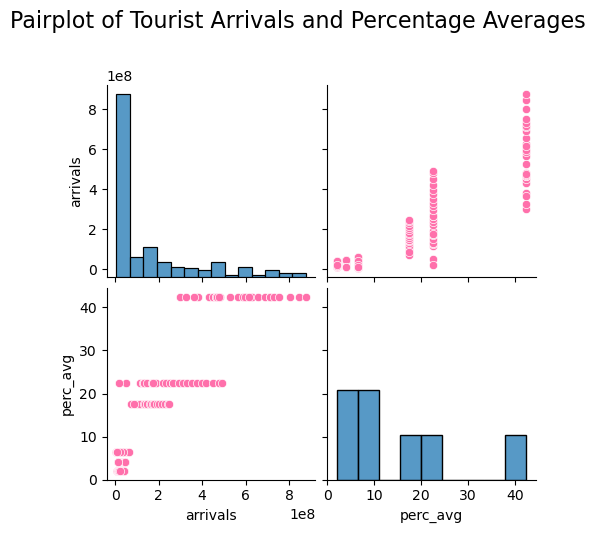

In [372]:

# Visualization 9:  Pairplot of Tourist Arrivals 
df.rename(columns={'international_tourist_arrivals_by_region': 'arrivals', 'percentage_avg': 'perc_avg'}, inplace=True)

sns.pairplot(df, vars=['arrivals', 'perc_avg'], plot_kws={'color': summer_cmap[0]})
plt.subplots_adjust(top=0.9)
plt.suptitle('Pairplot of Tourist Arrivals and Percentage Averages', fontsize=16, y=1.05)

plt.show()

In [ ]:
# Visualization 10: Bar Chart Race for Tourist Arrivals
bcr_html_path = 'tourist_arrivals_race.html'
bcr.bar_chart_race(
    df=arrivals_pivot,
    filename=bcr_html_path,
    cmap=custom_cmap,
    title='Bar Chart Race of International Tourist Arrivals'
)

print(f"Bar chart race saved to: {bcr_html_path}")


/opt/anaconda3/lib/python3.11/site-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
/opt/anaconda3/lib/python3.11/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(self.df_values.columns)
/opt/anaconda3/lib/python3.11/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
